In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

defenders = pd.read_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\Defenders.csv')
defenders.head(5)

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Virgil van Dijk,https://cdn.sofifa.org/players/4/20/203376.png,Netherlands,CB,27,90,90,Liverpool,203376,193.0,...,Medium,Medium,3,77,60,70,71,90,86,425
1,Kalidou Koulibaly,https://cdn.sofifa.org/players/4/20/201024.png,Senegal,CB,28,89,89,Napoli,201024,188.0,...,Medium,High,3,71,28,54,67,89,87,303
2,Sergio Ramos García,https://cdn.sofifa.org/players/4/20/155862.png,Spain,CB,33,89,89,Real Madrid,155862,182.9,...,High,Medium,4,72,68,75,73,87,85,211
3,Giorgio Chiellini,https://cdn.sofifa.org/players/4/20/138956.png,Italy,CB,34,89,89,Juventus,138956,188.0,...,Medium,High,4,68,46,58,60,90,82,106
4,Diego Godín,https://cdn.sofifa.org/players/4/20/182493.png,Uruguay,CB,33,88,88,Inter,182493,188.0,...,Medium,High,3,60,48,64,61,89,83,103


In [5]:
defenders = defenders.drop(['Image','ID','A/W','D/W','Release Clause','Hits','Joined','Total Stats','Loan Date End', 'Release Clause','Position','Wage','Value','Name', 'BOV', 'Potential','Club'], axis = 1)

In [6]:
defenders.loc[defenders['BP'] == 'CB', 'BP'] = 0
defenders.loc[(defenders['BP'] == 'LB') | (defenders['BP'] == 'LWB'), 'BP'] = 1
defenders.loc[(defenders['BP'] == 'RB') | (defenders['BP'] == 'RWB'), 'BP'] = 2
defenders['BP'].head(10)

defenders.loc[defenders['foot'] == 'Right', 'foot'] = 1
defenders.loc[defenders['foot'] == 'Left', 'foot'] = 0

In [7]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = defenders.Country.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Country in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
defenders1 = defenders.copy()

defenders1['Major_Nation'] = defenders1.apply(major_nation,axis = 1)

#Drop original columns used
defenders1 = defenders1.drop(['Country'], axis = 1)
defenders1.head()



,Age,Overall,Height,Weight,foot,BP,Growth,Attacking,Crossing,Finishing,...,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Major_Nation
0,27,90,193.0,92.3,1,0,1,314,53,52,...,3,2,3,77,60,70,71,90,86,0
1,28,89,188.0,89.1,1,0,2,220,30,22,...,3,2,3,71,28,54,67,89,87,0
2,33,89,182.9,82.3,1,0,0,370,66,63,...,3,3,4,72,68,75,73,87,85,1
3,34,89,188.0,85.0,0,0,0,280,54,33,...,3,2,4,68,46,58,60,90,82,0
4,33,88,188.0,78.2,1,0,0,308,52,42,...,3,2,3,60,48,64,61,89,83,0


In [8]:
#Split ID as a Target value
target = defenders1.Overall
explanatory_var = defenders1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(explanatory_var, target, test_size=0.2)

#One Hot Encoding
#x_train = pd.get_dummies(x_train)
#x_test = pd.get_dummies(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4923, 58) (4923,)
(1231, 58) (1231,)


In [17]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error

#import plotter
import seaborn as sns

import matplotlib.pyplot as  plt
%matplotlib inline

def applyModel(model, x_data, y_true):
    y_pred = model.predict(x_data)

    print('Model Name: ',type(model))
    print(y_pred[:10])
    print(y_true[:10])

    print('r2 score: '+str(r2_score(y_true, y_pred)))
    print('RMSE : '+str(np.sqrt(mean_squared_error(y_true, y_pred))))

    #Visualising the results
    # plt.figure()
    # plt.figure(figsize=(18,10))
    # sns.regplot(y_pred, y_true,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
    # plt.xlabel('Predictions')
    # plt.ylabel('Overall')
    # plt.title("Linear Prediction of Player Rating")
    # plt.show()
    plt.figure(figsize=(18,10))
    # sns.set(color_codes=True)
    # sns.set(rc={'figure.figsize':(18, 10)})
    sns.regplot(x=y_pred, y=y_true, fit_reg=False,scatter_kws={'color':'red','edgecolor':'blue','linewidth': 0.7},line_kws={'color':'black','alpha':0.5});
    #sns.regplot(x=y_pred, y=y_true,scatter=False, ax=ax, scatter_kws={"color": "green"});

Model Name:  <class 'sklearn.linear_model._base.LinearRegression'>
[72.61763218 71.86428244 64.18733395 62.86153006 63.06439283 74.07307014
 58.87279873 61.3150779  53.96489469 64.13916876]
746     74
1126    72
4441    63
4424    63
4250    63
919     73
5307    59
4481    62
5999    53
4554    62
Name: Overall, dtype: int64
r2 score: 0.972936469565298
RMSE : 1.0795195528001882
Model Name:  <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
[73.87043412 72.81419419 65.53907826 62.76214491 63.82134928 73.99824428
 59.66525165 61.49807509 54.75836169 65.32647187]
746     74
1126    72
4441    63
4424    63
4250    63
919     73
5307    59
4481    62
5999    53
4554    62
Name: Overall, dtype: int64
r2 score: 0.9668875847289125
RMSE : 1.1940808078576792


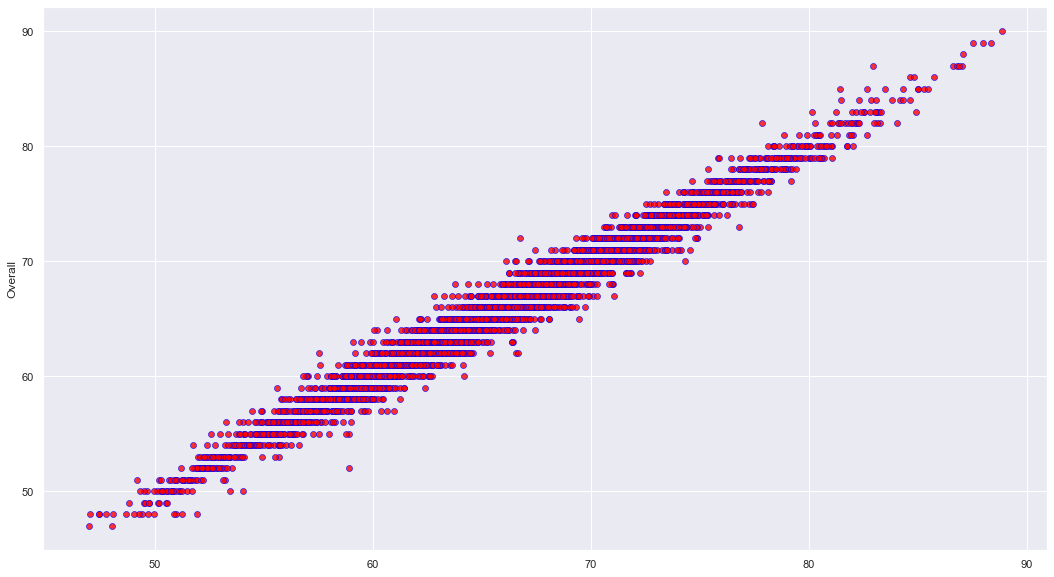

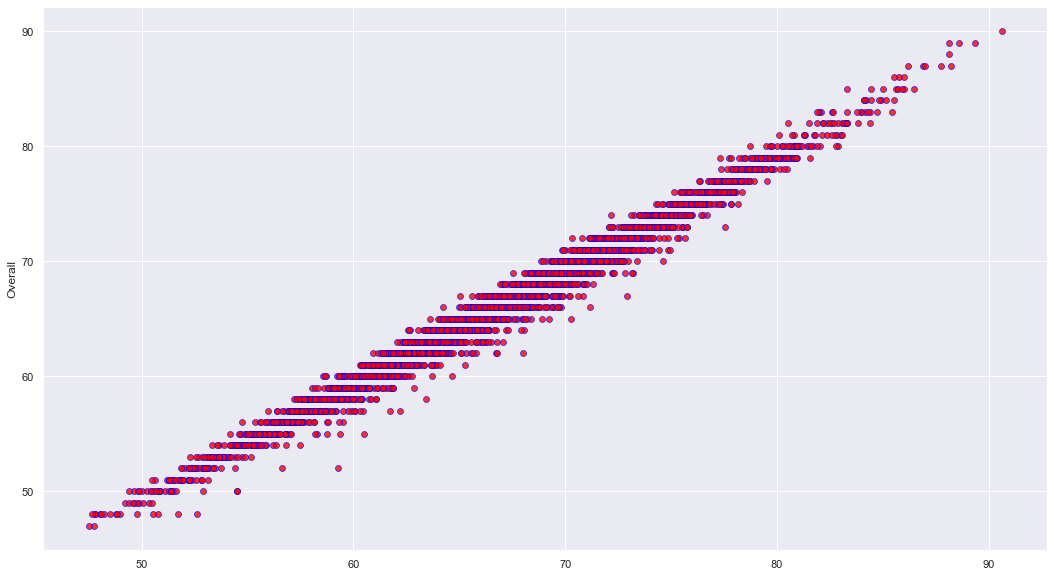

In [18]:
reg_mdels = [LinearRegression(), MLPRegressor(random_state=1, max_iter=500)]

for model in reg_mdels:
    model.fit(x_train, y_train)
    applyModel(model, x_train, y_train)

In [ ]:
print(predict_y.name)
predict_y = predict_y.rename('chemical_2')
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x=X, y=Y, fit_reg=False, ax=ax,scatter_kws={"color": "green"});
sns.regplot(x=X, y=predict_y,scatter=False, ax=ax, scatter_kws={"color": "green"});

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.inspection import permutation_importance

rf_reg_model = RandomForestRegressor(random_state=1, max_depth=10)
sgd_reg_model = SGDRegressor(random_state=1, max_iter=10)

rf_reg_model.fit(x_train, y_train)
sgd_reg_model.fit(x_train, y_train)

important_feat = rf_reg_model.feature_importances_

sgd_reg_model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(sgd_reg_model, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean.argsort()

print(enumerate(importance))

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

indices = np.argsort(important_feat)[-15:]  # top 10 features

print(indices)

In [ ]:
print(enumerate(importance[:0]))

In [ ]:

#Visualising the results
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test, color = "red")
#plt.plot(predictions, y_test, color = "green")
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [ ]:
indexes = defenders1._get_numeric_data().columns
print(indexes)

In [ ]:
defending_features = ['Age', 'Height', 'Weight', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY']
normalize_data = defenders1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
normalize_data[defending_features] =  min_max.fit_transform(normalize_data[defending_features])
#df_scaled = pd.DataFrame(player, columns=numerical_Data.columns,index=numerical_Data.index)
normalize_data.head(5)

In [ ]:
#Split ID as a Target value
n_target = normalize_data.Overall
n_explanatory_var = normalize_data.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_explanatory_var, n_target, test_size=0.2)

#One Hot Encoding
#x_train = pd.get_dummies(x_train)
#x_test = pd.get_dummies(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(n_y_test.head(10))

In [ ]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
n_model = LinearRegression()
n_model.fit(n_x_train, n_y_train)
n_predictions = n_model.predict(n_x_test)

print(n_predictions[:10])
print(n_y_test[:10])
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(n_y_test, n_predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(n_y_test, n_predictions))))

In [ ]:
n_perm = PermutationImportance(n_model, random_state=1).fit(n_x_test, n_y_test)
eli5.show_weights(n_perm, feature_names = n_x_test.columns.tolist())